____

<font size=+5 color=#FF5555> AML ICA </font>


<font size=+5 color=#5555FF> Machine Learning Workflow: Diabetes </font>

____


Before you get started, be sure to introduce yourself to your group members and tell them a bit about yourself. 




____

In this ICA we will explore a diabetes dataset. Before you start, have two discussions with your group. After you have these discussions, write two short paragraphs on the two ideas.

1. Using the internet, quickly explore what diabetes is and write a summary of this disease.
2. Have a short discussion with your group about potential ethical issues of using machine learning for medical applications.

Once those paragraphs are written, let's get to some coding! 

1. Diabetes is a chronic condition marked by elevated blood glucose levels due to insufficient insulin production (Type 1) or ineffective insulin use (Type 2). It can lead to serious health issues, emphasizing the importance of lifestyle management, medication adherence, and awareness for prevention.

2. Potential ethical issues: accountability, fairness, privacy, and transparency

___

Along with some of the other DS/ML-related Python libraries, `sklearn` provides several datasets that you can easily import. [Look here.](https://scikit-learn.org/stable/datasets/toy_dataset.html)  

Note that there is a diabetes dataset there and that its main use is regression. I chose this for today because of its simplicity: regression is similar to the types of curve-fitting we have all done before; with ML, we will extend those basic ideas in some small ways here. 

Be sure you understand this code:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

Let's load the [diabetes dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes) and look at some simple properties of it.  These are useful Pandas IDA methods: does this dataset have missing values? 

In [4]:

diabetes = datasets.load_diabetes()
diabetes_df = pd.DataFrame(data=np.c_[diabetes['data'], diabetes['target']], columns=diabetes['feature_names'] + ['target'])

# IDA

# info of the data
print("Info of the dataset:", diabetes_df.info())
# from this line we can see there is no missing data

# shape of the dataset
print("Shape of the dataset:", diabetes_df.shape)

# first few rows
print("First few rows of the dataset:\n", diabetes_df.head())

# summary statistics
print("Summary statistics of the dataset:\n", diabetes_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
Info of the dataset: None
Shape of the dataset: (442, 11)
First few rows of the dataset:
         age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.03

I like to look at the data with a bit more formatting, which is easy in a notebook: just type the name of the dataframe and shift-enter.

In [5]:
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


____

There was a question in the lecture regarding the explicit equation for the _Pearson correlation coefficient_.  The definitions [here](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) are the most commonly used. Review those definitions. In particular, note how the Pearson correlation coefficient is normalized: this is what makes it different from a covariance and is why it ranges in $[-1,1]$. 

Let's look at the correlations in this dataset.

In Pandas it is simple to examine the correlations in this dataset. 

In [6]:
diabetes_df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


It is often more useful to visualize these correlations. Discuss this plot with members of your group. What does it reveal to you? 

<Axes: >

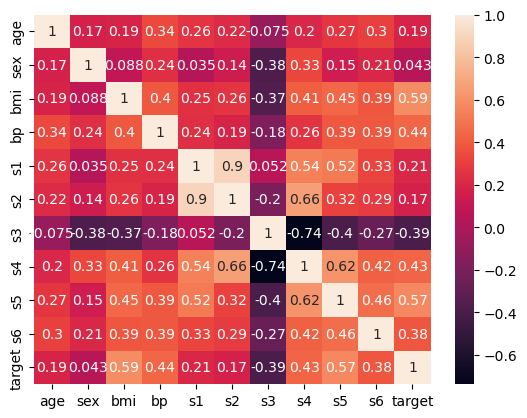

In [9]:
correlations = diabetes_df.corr()
sns.heatmap(correlations, annot =True)

From this heatmap, which features are most correlated with the target? 

As part of the EDA process, plot on the $y$ axis `target` and some of the other features (one by one) on the $x$ axis. Confirm that the colors in the heatmap correspond to the level of correlation these plots reveal. 

Be sure to make plots for:
* large positive correlations
* large negative correlations
* correlations near zero
* for features with only two values

Text(0, 0.5, 'Target')

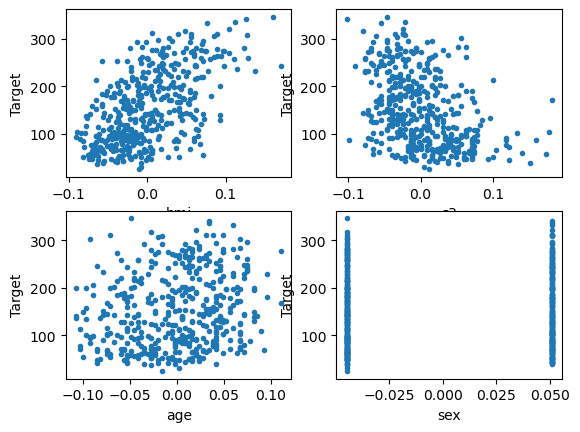

In [17]:
plt.subplot(2,2,1)
plt.plot(diabetes_df["bmi"], diabetes["target"], '.')
plt.xlabel("bmi")
plt.ylabel("Target")

plt.subplot(2,2,2)
# for negative correlation
plt.plot(diabetes_df["s3"], diabetes["target"], '.')
plt.xlabel("s3")
plt.ylabel("Target")


# for correlations near zero
plt.subplot(2,2,3)
plt.plot(diabetes_df["age"], diabetes["target"], '.')
plt.xlabel("age")
plt.ylabel("Target")

plt.subplot(2,2,4)
# for features with only two values
plt.plot(diabetes_df["sex"], diabetes["target"], '.')
plt.xlabel("sex")
plt.ylabel("Target")


##### Based on these plots, which feature does your group think is best? 

If you could only use one feature, how accurate do you think you could predict the target? 

Let's try it in `sklearn`!

Let's recall a few of the most important steps in our ML workflow:
* breaking the data into training and testing,
* performing the ML,
* obtaining a score.

Let's set up the code for that. 




In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

For regression we need to separate the data into an input $X$ and and output $y$. I'll do the first part, and you do the second part.  Here is my code:

In [42]:
X = diabetes_df.drop('target', axis=1)
y = diabetes_df['target']

From this $X$, separate one column at a time. This will allow you to perform linear regression on every feature separately. 

A common question asked about datasets is: _what is the most important feature_? This will allow you to answer that: get the score for each of the features in $X$ and evaluate which ones give the best score. Those scores can be compared to the correlation heatmap you have above. 

I'll make one and your group makes the rest. If you are not familiar with these steps, pay attention to what is being done and what Python containers we are using. Note that at the moment we are staying with Pandas dataframes, which do not work directly with Numpy and some Python libraries; sometimes you will need to convert to another data structure. (Technically, we are here making a Pandas series.) 

In [43]:
X_age = X[["age"]]

In [44]:
# you will want to do this for different columns
X_train, X_test, y_train, y_test = train_test_split(X_age, y, test_size=0.2, random_state=0)

Recall from the lecture that the ML step is about two lines of code: instantiating the ML and fitting the data to it. What does that look like?

Discuss this with your group to be sure everyone understand exactly what is being done here. 

In [45]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [46]:
y_pred = model.predict(X_test)

In [47]:
r2 = r2_score(y_test, y_pred)

# Displaying the parameters
coefficients1 = model.coef_
intercept1 = model.intercept_

print("R-squared score:", r2)
print("Coefficients:", coefficients1)
print("Intercept:", intercept1)

R-squared score: 0.03400038308863318
Coefficients: [303.51868725]
Intercept: 151.35289451808345


In [25]:
# test for bmi with target for linear regression
X_bmi = X[["bmi"]]

# you will want to do this for different columns
X_train, X_test, y_train, y_test = train_test_split(X_bmi, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Displaying the parameters
coefficients2 = model.coef_
intercept2 = model.intercept_

print("R-squared score:", r2)
print("Coefficients:", coefficients2)
print("Intercept:", intercept2)

R-squared score: 0.19057346847560142
Coefficients: [981.65543614]
Intercept: 152.28824927379569



Do you get a difference result if you change the proportion of the test data?

How well did the regression work? Make a plot of the line you obtained for some of the features with the data to ensure you are indeed obtaining the best fit line to the feature you are using. 

That is, use the outputs of the ML `coef_` and `intercept_` to add a line to a plot with the data points. 

In [64]:
X_age
X_1= diabetes_df['age']
max(X_age)
x_range = np.linspace(X_1.min(), X_1.max(), 100)
x_range

array([-0.10722563, -0.10502409, -0.10282255, -0.10062102, -0.09841948,
       -0.09621794, -0.0940164 , -0.09181486, -0.08961332, -0.08741179,
       -0.08521025, -0.08300871, -0.08080717, -0.07860563, -0.07640409,
       -0.07420255, -0.07200102, -0.06979948, -0.06759794, -0.0653964 ,
       -0.06319486, -0.06099332, -0.05879179, -0.05659025, -0.05438871,
       -0.05218717, -0.04998563, -0.04778409, -0.04558255, -0.04338102,
       -0.04117948, -0.03897794, -0.0367764 , -0.03457486, -0.03237332,
       -0.03017179, -0.02797025, -0.02576871, -0.02356717, -0.02136563,
       -0.01916409, -0.01696255, -0.01476102, -0.01255948, -0.01035794,
       -0.0081564 , -0.00595486, -0.00375332, -0.00155179,  0.00064975,
        0.00285129,  0.00505283,  0.00725437,  0.00945591,  0.01165744,
        0.01385898,  0.01606052,  0.01826206,  0.0204636 ,  0.02266514,
        0.02486668,  0.02706821,  0.02926975,  0.03147129,  0.03367283,
        0.03587437,  0.03807591,  0.04027744,  0.04247898,  0.04

TypeError: unsupported format string passed to numpy.ndarray.__format__

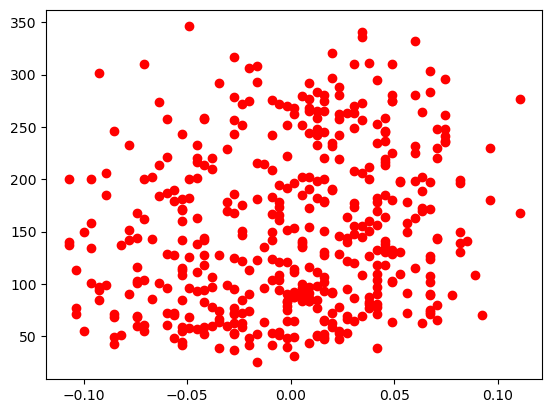

In [65]:
# Plot the data points for age and bmi
plt.scatter(X_age, y, color='red', label='Data Points')

# Plot the linear regression line
x_range = np.linspace(X_1.min(), X_1.max(), 100)
y_fit = intercept1+ coefficients1 * x_range
plt.plot(x_range, y_fit, color='blue', label=f'Linear Regression: $y = {intercept1:.2f} + {coefficients1:.2f}x$')

# Set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()

# Show the plot
plt.show()

______

<font size=+1 color=#BB5511> Your turn! </font>

I did most of the coding so far. Now, you are on your own. Complete this ICA by performing these two additinoal steps:
1. use `StandardScaler` to [scale the data](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) first; note that you only need to add a couple of lines of code and rerun to obtain new scores
2. perform _multiple linear regression_ to see if you can increase the score.

Multiple linear regression simply refers to using more than one feature. In other words, rather than fitting to 
$$y = w_0 + w_1x$$
you fit to 
$$ y = w_0 + w_1x_1 + w_2x_2 + \ldots,$$
where the $x_j$ are the features (columns of $X$). Again, this is a one-line change using something like:
`X_more_features = X[["s5", "s3", "bmi"]]`.

How much more powerful is the regression as you add more features? Try to investigate different combination of the these features. 


In [40]:
X = diabetes_df.drop('target', axis=1)
y = diabetes_df['target']

from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
diabetes_ = std_scaler.fit_transform(X)


# you will want to do this for different columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Displaying the parameters
coefficients2 = model.coef_
intercept2 = model.intercept_

print("R-squared score:", r2)
print("Coefficients:", coefficients2)
print("Intercept:", intercept2)

R-squared score: 0.3322332173106184
Coefficients: [ -35.55025079 -243.16508959  562.76234744  305.46348218 -662.70290089
  324.20738537   24.74879489  170.3249615   731.63743545   43.0309307 ]
Intercept: 152.5380470138517


# 

In [41]:
X = X[["s5", "s4", "bmi","bp"]]
# you will want to do this for different columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Displaying the parameters
coefficients2 = model.coef_
intercept2 = model.intercept_

print("R-squared score:", r2)
print("Coefficients:", coefficients2)
print("Intercept:", intercept2)

R-squared score: 0.336503871521999
Coefficients: [528.57979041  59.80096102 627.46683461 224.87074161]
Intercept: 152.1493243002168


In [52]:
X = diabetes_df.drop('target', axis=1)
y = diabetes_df['target']

from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
diabetes_ = std_scaler.fit_transform(X)

X = X[["sex", "s1", "bmi","bp","s2","s5"]]
# you will want to do this for different columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Displaying the parameters
coefficients2 = model.coef_
intercept2 = model.intercept_

print("R-squared score:", r2)
print("Coefficients:", coefficients2)
print("Intercept:", intercept2)

R-squared score: 0.3331095414060955
Coefficients: [-231.83717335 -794.48390752  566.60687151  295.49432931  516.43324611
  847.70945512]
Intercept: 152.64269530106148
